In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
df = pd.read_csv('social_media.csv')
df.head()

,post_id,platform,timestamp,content_category,user_followers,likes,comments,shares,sentiment_score,user_location,engagement_rate
0,1,LinkedIn,2024-01-01 00:00:00,Food,485108,3910,4759,7092,-0.452,UK,0.071539
1,2,Facebook,2024-01-01 02:00:00,Food,451170,13726,4120,6094,0.968,Australia,0.089208
2,3,YouTube,2024-01-01 04:00:00,Tech,433578,6991,1990,2632,-0.181,Canada,0.043515
3,4,Facebook,2024-01-01 06:00:00,Fitness,168252,6386,4805,4494,0.788,UK,0.175201
4,5,Facebook,2024-01-01 08:00:00,Food,394640,16917,3572,6960,-0.540,India,0.113878


In [ ]:
# Dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           300 non-null    int64  
 1   platform          300 non-null    object 
 2   timestamp         300 non-null    object 
 3   content_category  300 non-null    object 
 4   user_followers    300 non-null    int64  
 5   likes             300 non-null    int64  
 6   comments          300 non-null    int64  
 7   shares            300 non-null    int64  
 8   sentiment_score   300 non-null    float64
 9   user_location     300 non-null    object 
 10  engagement_rate   300 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 25.9+ KB


,post_id,user_followers,likes,comments,shares,sentiment_score,engagement_rate
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,250433.886667,9876.706667,2640.423333,3933.623333,-0.003923,0.593019
std,86.746758,141698.456713,5699.127675,1480.620553,2309.657622,0.587394,3.537930
min,1.000000,504.000000,19.000000,38.000000,2.000000,-0.990000,0.006595
25%,75.750000,133946.250000,5289.250000,1310.250000,1913.750000,-0.525750,0.066530
50%,150.500000,266516.000000,9790.000000,2830.000000,3873.500000,-0.005000,0.104404
75%,225.250000,364378.250000,14295.000000,3984.750000,5869.000000,0.467750,0.223973
max,300.000000,498970.000000,19925.000000,4944.000000,7941.000000,0.999000,50.287698


In [ ]:
# Converting Column into Datetime

df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

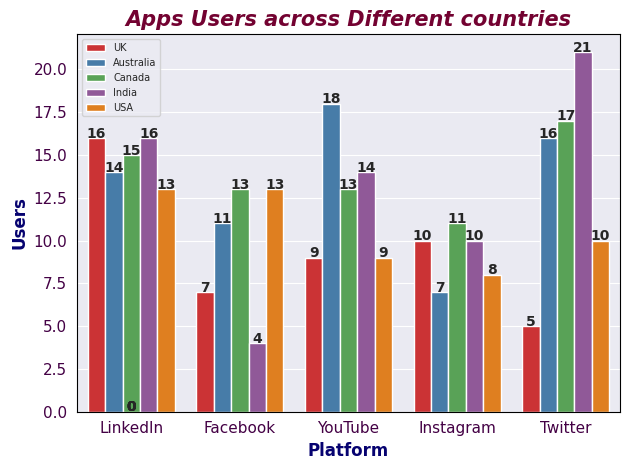

In [ ]:
# Page Theme
sns.set_style('darkgrid')

# Countplot
ax = sns.countplot(x='platform',data=df,hue='user_location',palette='Set1')

# Annotation
for i in ax.patches:
    length = i.get_height()
    plt.text(i.get_x()+i.get_width()/2,length+0.02,round(length),ha='center',fontweight='bold')

# Styling Title , Labels , Ticks
plt.title('Apps Users across Different countries',fontweight='bold',fontsize=15,fontstyle='oblique',color='#730231')
plt.xlabel('Platform',fontweight='bold',fontsize=12,color='#060270')
plt.ylabel('Users',fontweight='bold',fontsize=12,color='#060270')
plt.tick_params(axis='both',labelsize=11,labelcolor='#440145')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Page Layout
plt.legend(loc='upper left',fontsize=7)
plt.tight_layout()
plt.show()

# Insight
# A few platforms dominate user engagement across all countries. The pattern is consistent everywhere,
# showing that platform popularity doesn’t depend much on location.

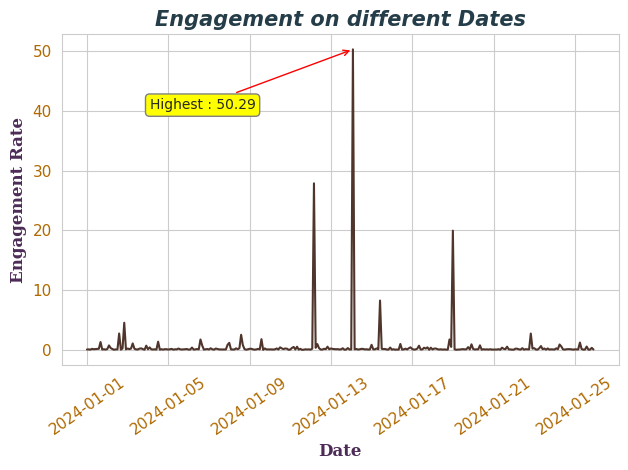

In [ ]:
# Page Theme
sns.set_style('whitegrid')

# Lineplot
sns.lineplot(x='timestamp',y='engagement_rate',data=df,color='#4F352B')

# Annotation
rate = df['engagement_rate'].idxmax()
x = df.loc[rate,'timestamp']
y = df.loc[rate,'engagement_rate']
plt.annotate(f'Highest : {round(y,2)}',xy=(x,y),xytext=(x-pd.Timedelta(days=10),y-10),
             bbox=dict(facecolor='yellow',edgecolor='grey',boxstyle='round'),arrowprops=dict(arrowstyle='->',color='r'))
# Styling Title and Labels
plt.title('Engagement on different Dates',fontsize=15,fontweight='bold',fontstyle='oblique',color='#253D48')
plt.xlabel('Date',fontsize=12,fontweight='bold',fontfamily='Serif',color='#4C2B57')
plt.ylabel('Engagement Rate',fontsize=12,fontweight='bold',fontfamily='Serif',color='#4C2B57')
plt.tick_params(axis='both',labelsize=11,labelcolor='#AF6901')
plt.xticks(rotation=35)

# Page Layout
plt.tight_layout()
plt.show()

# Insight
# Engagement isn’t stable; it fluctuates throughout the timeline.
# One date shows a clear peak, indicating a strong moment of user activity.

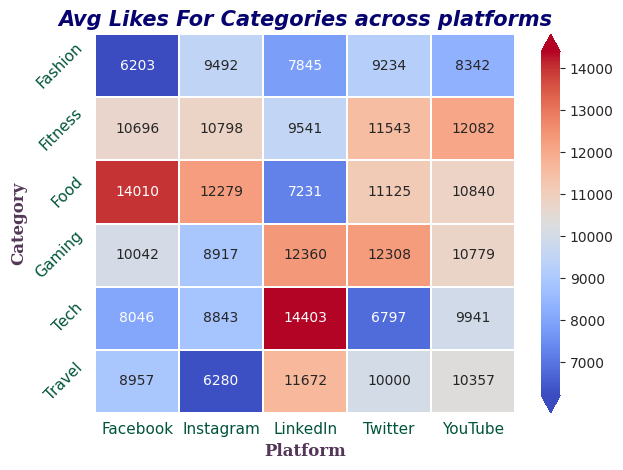

In [ ]:
# Feature Engineering
avg_fol = pd.pivot_table(df,index='content_category',columns='platform',values='likes',aggfunc='mean')

# Heatmap
c = {'shrink':1,'extend':'both'}
sns.heatmap(avg_fol,annot=True,fmt='.0f',linewidth=0.1,cmap='coolwarm',cbar_kws=c)

# Styling Title and Labels
plt.title('Avg Likes For Categories across platforms',fontweight='bold',color='#060270',fontstyle='oblique',fontsize=15)
plt.xlabel('Platform',fontweight='bold',color='#543758',fontfamily='Serif',fontsize=12)
plt.ylabel('Category',fontweight='bold',color='#543758',fontfamily='Serif',fontsize=12)
plt.tick_params(axis='both',labelcolor='#01543B',labelsize=11)
plt.yticks(rotation=45)

# Page Layout
plt.tight_layout()
plt.show()

# Insights
# Likes vary heavily across content categories depending on the platform.
# Each platform has its own strongest-performing content types.

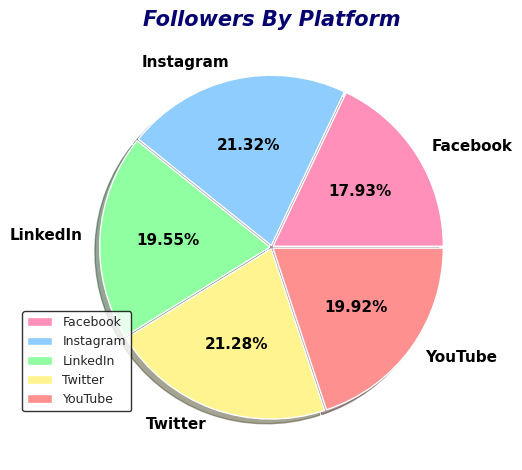

In [ ]:
# Feature Engineering
fol = df.groupby('platform')['user_followers'].mean().reset_index()

# Pie Chart
c = ['#FF90B9','#90CDFF','#90FFA1','#FFF490','#FF9090']
e = [0.01 for x in range(5)]
plt.pie(fol['user_followers'],shadow=True,colors=c,explode=e,autopct='%.2f%%',labels=fol['platform'],textprops=
       dict(color='k',fontsize=11,fontweight='bold'))

# Styling Title
plt.title('Followers By Platform',fontweight='bold',color='#060270',fontstyle='oblique',fontsize=15)
plt.legend(edgecolor='k',fontsize=9,loc='lower left',bbox_to_anchor=(-0.1,0.1))

# Page Layout
plt.tight_layout()
plt.show()

# Insights
# Follower share across platforms is almost evenly distributed, with no platform taking a major lead.
# The audience size is balanced, meaning all platforms attract a fairly similar level of followers.

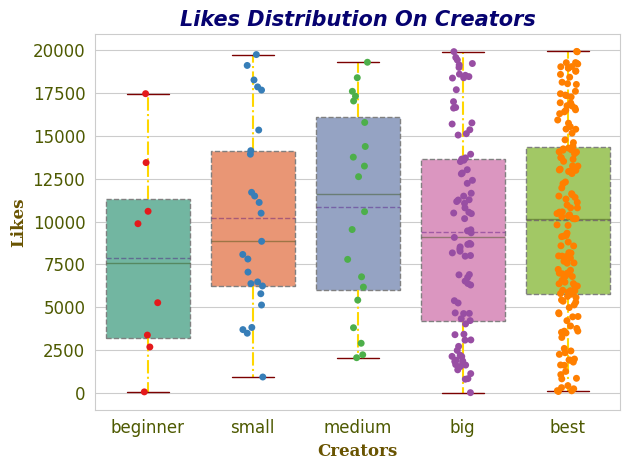

In [ ]:
# Feature Engineering
b = [0,10000,50000,100000,250000,float('inf')]
l = ['beginner','small','medium','big','best']
df['Creator'] = pd.cut(df['user_followers'],bins=b,labels=l)

# Page Theme
sns.set_style('whitegrid')

# Boxplot + Stripplot
b = {'edgecolor':'grey','linestyle':'--'}
w = {'color':'gold','linewidth':1.5,'linestyle':'-.'}
c = {'color':'#7B0101'}
m = {'color':'#48017B','alpha':0.4}
ml = {'color':'#2B4501','alpha':0.4}
sns.boxplot(x='Creator',y = 'likes',data=df,hue ='Creator',palette='Set2',showmeans=True,meanline=True,boxprops=b,whiskerprops=w,capprops=c,
           meanprops=m,medianprops=ml)
sns.stripplot(x='Creator',y = 'likes',data=df,hue ='Creator',palette='Set1')

# Styling Title and Labels
plt.title('Likes Distribution On Creators',fontweight='bold',color='#060270',fontstyle='oblique',fontsize=15)
plt.xlabel('Creators',fontweight='bold',color='#695401',fontfamily='Serif',fontsize=12)
plt.ylabel('Likes',fontweight='bold',color='#695401',fontfamily='Serif',fontsize=12)
plt.tick_params(axis='both',labelcolor='#4E5A01',labelsize=12)

# Page Layout
plt.tight_layout()
plt.show()

# Insights
# Higher follower creators tend to get more likes, but the spread is large across all groups.
# Even smaller creators can occasionally reach high Likes.

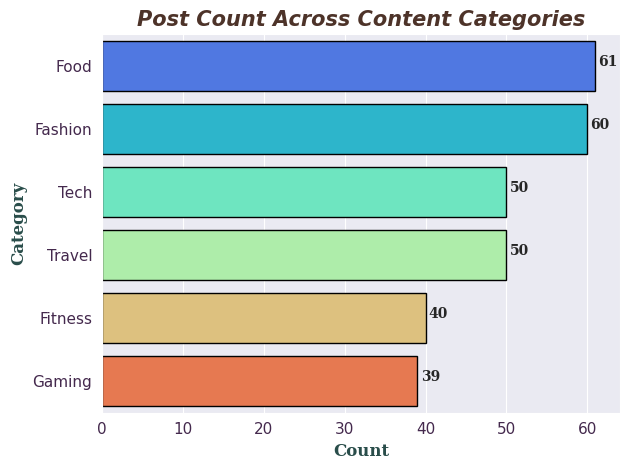

In [ ]:
# Feature Engineering
content = df['content_category'].value_counts().reset_index()
content.columns = ['content_category', 'count']

# Page Theme
sns.set_style('darkgrid')

# Barplot
ax = sns.barplot(x='count',y='content_category',data=content,orient='h',hue='content_category',dodge=False,palette='rainbow',edgecolor='k')

# Annotation
for i in ax.patches:
    width = i.get_width()
    if width > 0 :
        plt.text(width+0.4,i.get_y()+i.get_height()/2,round(width),fontweight='bold',fontfamily='Serif')

# Styling Title and Lables
plt.title('Post Count Across Content Categories',fontweight='bold',color='#4D3329',fontstyle='oblique',fontsize=15)
plt.xlabel('Count',fontweight='bold',color='#294D4A',fontfamily='Serif',fontsize=12)
plt.ylabel('Category',fontweight='bold',color='#294D4A',fontfamily='Serif',fontsize=12)
plt.tick_params(axis='both',labelcolor='#44294D',labelsize=11)

# Page Layout
plt.tight_layout()
plt.show()

# Insights :
# Some content categories appear much more frequently than others, suggesting creators tend to focus on few popular Category.
# This leads to an imbalanced distribution of posts across categories.

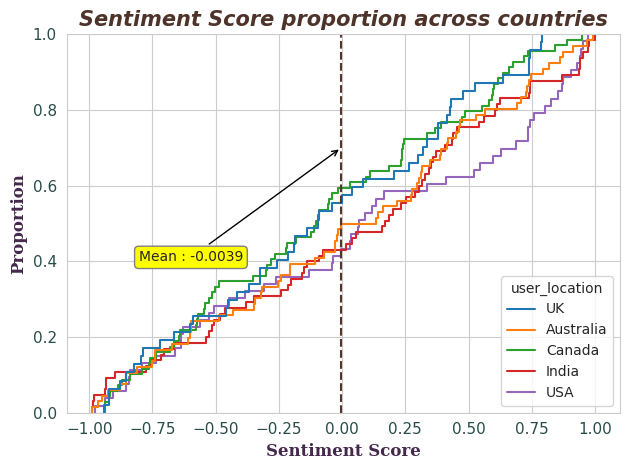

In [ ]:
# Page Theme
sns.set_style('whitegrid')

# ECDF plot
sns.ecdfplot(data=df,x='sentiment_score',hue='user_location')

# Annotation
score = df['sentiment_score'].mean()
plt.axvline(x=score,linestyle='--',color='#54352A')
plt.annotate(f'Mean : {round(score,4)}',xy=(score,0.7),xytext=(score-0.8,0.4),bbox=dict(facecolor='yellow',edgecolor='grey',boxstyle='round'),
            arrowprops=dict(arrowstyle='->',color='k'))
# Styling Title and Labels
plt.title('Sentiment Score proportion across countries',fontweight='bold',color='#4D3329',fontstyle='oblique',fontsize=15)
plt.xlabel('Sentiment Score',fontsize=12,color='#44294D',fontweight='bold',fontfamily='Serif')
plt.ylabel('Proportion',fontsize=12,color='#44294D',fontweight='bold',fontfamily='Serif')
plt.tick_params(axis='both',labelcolor='#294D4B',labelsize=11)

# Page Layout
plt.tight_layout()
plt.show()

# Insights :
# Sometimes sentiment patterns differ slightly across countries.
# Countries with steeper ECDF curves tend to have more users with lower sentiment scores,
# while flatter curves indicate a more positive or balanced sentiment distribution.

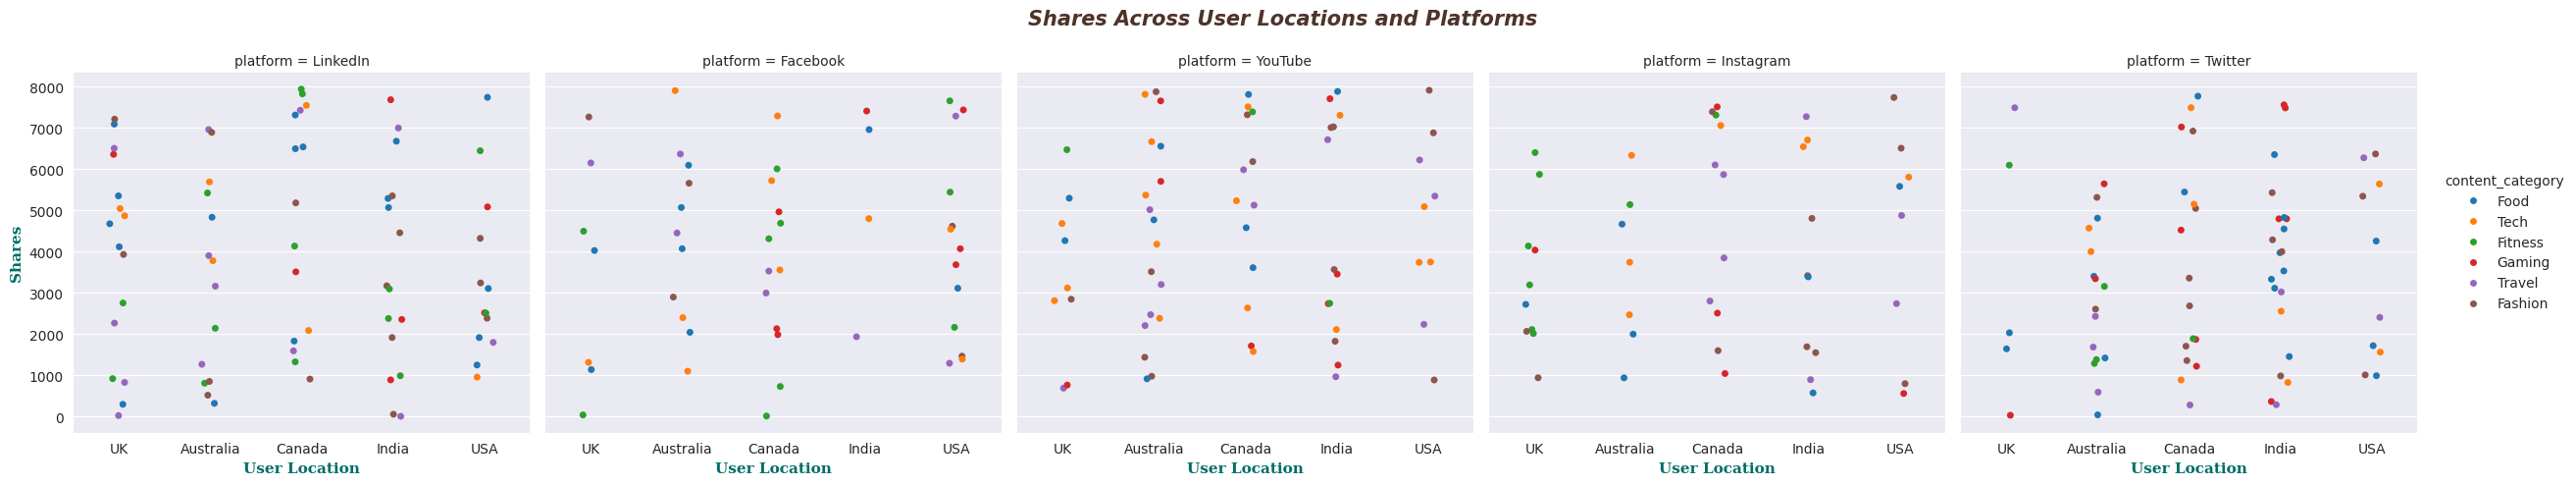

In [ ]:
# Page Theme
sns.set_style('darkgrid')

# Catplot
ax = sns.catplot(x='user_location',y='shares',data=df,col='platform',hue='content_category',sharex=True,sharey=True)

# Styling Title and Lables
plt.suptitle('Shares Across User Locations and Platforms',fontweight='bold',color='#4D3329',fontstyle='oblique',fontsize=15)
plt.subplots_adjust(top=0.85)
for i in ax.axes.flat:
    i.set_xlabel('User Location',fontweight='bold',fontfamily='Serif',color='#006E67',fontsize=11)
    i.set_ylabel('Shares',fontweight='bold',fontfamily='Serif',color='#006E67',fontsize=11)

# Page Layout
plt.show()

# Insights :
# Shares vary widely across locations, and this pattern also shifts between platforms.
# Some content categories consistently get more shares, showing strong audience preference across regions.